In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from datetime import datetime

# Clean up

In [2]:
df = pd.read_csv('PPR-2010-2023.csv')

/var/folders/55/j0v2zlbn1575rkmztsycxlfw0000gn/T/ipykernel_26014/3239213054.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PPR-2010-2023.csv')


In [3]:
df['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres',
       'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach',
       'n?os l? n? 38 m?adar cearnach'], dtype=object)

In [4]:
#df[df['Eircode'].notna()]

In [5]:
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe',
       'Teach/Árasán Cónaithe Nua', 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

In [6]:
county = df['County'].unique()
county

array(['Dublin', 'Laois', 'Meath', 'Kilkenny', 'Limerick', 'Carlow',
       'Cork', 'Clare', 'Sligo', 'Cavan', 'Tipperary', 'Wicklow',
       'Roscommon', 'Wexford', 'Mayo', 'Donegal', 'Longford', 'Galway',
       'Offaly', 'Kildare', 'Waterford', 'Louth', 'Kerry', 'Westmeath',
       'Monaghan', 'Leitrim'], dtype=object)

In [7]:
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [8]:
l = []
for column in df.columns:
    l.append(len(df[df[column].isna()]))

In [9]:
l

[0, 0, 0, 503057, 0, 0, 0, 0, 536210]

$\therefore$ Eircode and Property Size Descriptions have a lot of NA values so we will ignore those 2 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589024 entries, 0 to 589023
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  589024 non-null  object
 1   Address                    589024 non-null  object
 2   County                     589024 non-null  object
 3   Eircode                    85967 non-null   object
 4   Price ()                  589024 non-null  object
 5   Not Full Market Price      589024 non-null  object
 6   VAT Exclusive              589024 non-null  object
 7   Description of Property    589024 non-null  object
 8   Property Size Description  52814 non-null   object
dtypes: object(9)
memory usage: 40.4+ MB


for every row in address
split string and choose the last index
if " " in last index
split(" ")[-1]
if the last index == county
delete the last index
else
pass
index[-2] is the town name

In [11]:
df = df.drop('Property Size Description', axis=1)

In [12]:
df = df.drop('Eircode',axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589024 entries, 0 to 589023
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  589024 non-null  object
 1   Address                    589024 non-null  object
 2   County                     589024 non-null  object
 3   Price ()                  589024 non-null  object
 4   Not Full Market Price      589024 non-null  object
 5   VAT Exclusive              589024 non-null  object
 6   Description of Property    589024 non-null  object
dtypes: object(7)
memory usage: 31.5+ MB


In [14]:
def clean_price(string):
    string = string.replace(",","")
    return float(string[1:])
Price = df['Price ()'].apply(clean_price)

In [15]:
df = df.drop('Price ()',axis=1)

In [16]:
df['Price'] = Price

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589024 entries, 0 to 589023
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date of Sale (dd/mm/yyyy)  589024 non-null  object 
 1   Address                    589024 non-null  object 
 2   County                     589024 non-null  object 
 3   Not Full Market Price      589024 non-null  object 
 4   VAT Exclusive              589024 non-null  object 
 5   Description of Property    589024 non-null  object 
 6   Price                      589024 non-null  float64
dtypes: float64(1), object(6)
memory usage: 31.5+ MB


In [19]:
df["VAT Exclusive"].value_counts()

No     494042
Yes     94982
Name: VAT Exclusive, dtype: int64

In [19]:
#df['Not Full Market Price'] = df['Not Full Market Price'].apply(lambda x: 0 if x == "No" else 1)

In [21]:
#df['VAT Exclusive'] = df['VAT Exclusive'].apply(lambda x: 0 if x == "No" else 1)

In [23]:
#df['Date'] = df['Date of Sale (dd/mm/yyyy)']

In [24]:
#df = df.drop('Date of Sale (dd/mm/yyyy)',axis=1)

In [24]:
df.rename(columns = {"Date of Sale (dd/mm/yyyy)":"Date"},inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589024 entries, 0 to 589023
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Date                     589024 non-null  object 
 1   Address                  589024 non-null  object 
 2   County                   589024 non-null  object 
 3   Not Full Market Price    589024 non-null  object 
 4   VAT Exclusive            589024 non-null  object 
 5   Description of Property  589024 non-null  object 
 6   Price                    589024 non-null  float64
dtypes: float64(1), object(6)
memory usage: 31.5+ MB


In [26]:
#df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe',
       'Teach/Árasán Cónaithe Nua', 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

'Teach/Árasán Cónaithe Atháimhe' = 'Second hand House/Apartment'  

'Teach/Árasán Cónaithe Nua' = 'New House/Apartment'  

'Teach/?ras?n C?naithe Nua' = 'New House/Apartment'  

'New Dwelling house /Apartment' = 'New House/Apartment'  

'Second-Hand Dwelling house /Apartment' = 'Second Hand House/Apartment'

In [28]:
replacement_dict = {
    'Second-Hand Dwelling house /Apartment':'Second-Hand',
    'New Dwelling house /Apartment':'New',
    'Teach/Árasán Cónaithe Atháimhe':'Second-Hand',
    'Teach/Árasán Cónaithe Nua':'New',
    'Teach/?ras?n C?naithe Nua':'New'
}

In [29]:
df['Description of Property'] = df['Description of Property'].replace(replacement_dict)

In [30]:
df.head()

,Date,Address,County,Not Full Market Price,VAT Exclusive,Description of Property,Price
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,No,No,Second-Hand,343000.0
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,No,Yes,New,185000.0
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,No,No,Second-Hand,438500.0
3,04/01/2010,"1 The Haven, Mornington",Meath,No,No,Second-Hand,400000.0
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,No,No,Second-Hand,160000.0


In [31]:
df = df[['Date','Address','County','Price','Not Full Market Price','VAT Exclusive','Description of Property']]

In [32]:
df.head()

,Date,Address,County,Price,Not Full Market Price,VAT Exclusive,Description of Property
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,No,Yes,New
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,No,No,Second-Hand


In [33]:
address = df['Address']

In [34]:
address[0].split(',')[-1]

' Co.Dublin'

In [36]:
for i in range(10):
    display(df['Address'].loc[i])

'5 Braemor Drive, Churchtown, Co.Dublin'

'134 Ashewood Walk, Summerhill Lane, Portlaoise'

'1 Meadow Avenue, Dundrum, Dublin 14'

'1 The Haven, Mornington'

'11 Melville Heights, Kilkenny'

'12 Sallymount Avenue, Ranelagh'

'13  Oakleigh Wood, Dooradoyle, Limerick'

'13 The Drive, Chapelstown Gate, Tullow Road'

'15 Carriglawn, Waterpark, Carrigaline'

'15a Moore Bay, Kilkee'

In [35]:
df['Address'].loc[3].split(',')[-1][1:]

'Mornington'

In [36]:
df['Address'].loc[0].split(',')[:-1][-1].strip()

'Churchtown'

In [39]:
# for i in range(len(df)):
#     if df['Address'].loc[i].split(',')[-1][1:] == df['County'].loc[i]:
#         df['Address'].loc[i] = df['Address'].loc[i].split(',')[:-1][-1].strip()
#     else:
#         continue

In [40]:
df['County'].loc[0].lower()

'dublin'

In [41]:
df['Address'].loc[0].split(',')[-1][1:].split(" ")[-1].split('.')[-1].lower()

'dublin'

In [42]:
df['Address'].loc[0].split(',')[-2][1:]

'Churchtown'

In [37]:
df['Address'].loc[4].split(',')[-1][1:].split(" ")[-1].split('.')[-1].lower()

'kilkenny'

In [45]:
df['Address'].loc[4].split(',')[-2].strip()

'11 Melville Heights'

In [53]:
Town = []
for i in range(len(df)):
    if df['Address'].loc[i].split(',')[-1][1:].split(" ")[-1].split('.')[-1].lower() == df['County'].loc[i].lower():
        if any(char.isdigit() for char in df['Address'].loc[i].split(',')[-2].strip()):
            string = re.sub(r"\d+","", df['Address'].loc[i].split(',')[-2].strip())
            Town.append(string.lower())
        else:
            Town.append(df['Address'].loc[i].split(',')[-2].strip().lower())
    else:
        Town.append(df['Address'].loc[i].split(',')[-1].strip().lower())


In [54]:
len(Town)

589024

In [55]:
df['Town'] = Town

/var/folders/55/j0v2zlbn1575rkmztsycxlfw0000gn/T/ipykernel_26014/3908036172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Town'] = Town


In [56]:
df

,Date,Address,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Town
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000.0,No,No,Second-Hand,churchtown
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000.0,No,Yes,New,portlaoise
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500.0,No,No,Second-Hand,dublin 14
3,04/01/2010,"1 The Haven, Mornington",Meath,400000.0,No,No,Second-Hand,mornington
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,160000.0,No,No,Second-Hand,melville heights
...,...,...,...,...,...,...,...,...
589019,16/03/2023,"NO 1 PRIORY HALL, BALLAGHADERREEN, CO ROSCOMMON",Roscommon,135000.0,No,No,Second-Hand,ballaghaderreen
589020,16/03/2023,"RAMPARK, JENKINSTOWN, DUNDALK",Louth,305000.0,No,No,Second-Hand,dundalk
589021,16/03/2023,"ROSSNAPARTEN, LOW ROAD SHROOVE, GREENCASTLE",Donegal,430000.0,No,No,Second-Hand,greencastle
589022,16/03/2023,"THE CAPTAINS TABLE, MEIN, KNOCKNAGOSHEL",Kerry,50000.0,No,No,Second-Hand,knocknagoshel


In [57]:
d15 = df[df['Town'] == 'dublin 15']

In [58]:
d15.loc[d15['Price'].idxmax()]

Date                                                              29/10/2020
Address                    1-46 Royal Canal Crescent, Rathborne Park, Dub...
County                                                                Dublin
Price                                                            16308370.05
Not Full Market Price                                                     No
VAT Exclusive                                                            Yes
Description of Property                                                  New
Town                                                               dublin 15
Name: 444703, dtype: object

In [49]:
df.loc[df['Price'].idxmax()]

Date                                                     10/02/2023
Address                    O'Devaney Gardens, Arbour Hill, Dublin 7
County                                                       Dublin
Price                                                   225000000.0
Not Full Market Price                                             1
VAT Exclusive                                                     1
Description of Property                                         New
Town                                                       Dublin 7
Name: 585087, dtype: object

In [59]:
df_cleaned = df[['Date','Town','County','Price','Not Full Market Price','VAT Exclusive','Description of Property']]

In [60]:
df_cleaned

,Date,Town,County,Price,Not Full Market Price,VAT Exclusive,Description of Property
0,01/01/2010,churchtown,Dublin,343000.0,No,No,Second-Hand
1,03/01/2010,portlaoise,Laois,185000.0,No,Yes,New
2,04/01/2010,dublin 14,Dublin,438500.0,No,No,Second-Hand
3,04/01/2010,mornington,Meath,400000.0,No,No,Second-Hand
4,04/01/2010,melville heights,Kilkenny,160000.0,No,No,Second-Hand
...,...,...,...,...,...,...,...
589019,16/03/2023,ballaghaderreen,Roscommon,135000.0,No,No,Second-Hand
589020,16/03/2023,dundalk,Louth,305000.0,No,No,Second-Hand
589021,16/03/2023,greencastle,Donegal,430000.0,No,No,Second-Hand
589022,16/03/2023,knocknagoshel,Kerry,50000.0,No,No,Second-Hand


In [61]:
df_cleaned.to_csv('PPR-cleaned.csv',index=False)

# EDA

In [27]:
df = pd.read_csv('PPR-cleaned.csv')
df.head()

,Date,Town,County,Price,Not Full Market Price,VAT Exclusive,Description of Property
0,01/01/2010,churchtown,Dublin,343000.0,No,No,Second-Hand
1,03/01/2010,portlaoise,Laois,185000.0,No,Yes,New
2,04/01/2010,dublin 14,Dublin,438500.0,No,No,Second-Hand
3,04/01/2010,mornington,Meath,400000.0,No,No,Second-Hand
4,04/01/2010,melville heights,Kilkenny,160000.0,No,No,Second-Hand


In [28]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


/var/folders/55/j0v2zlbn1575rkmztsycxlfw0000gn/T/ipykernel_28266/2442068185.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [2]:
# fig = px.scatter(df, x="Date", y="Price", size="Price", hover_data=["Town","County","Price","Description of Property"])

In [1]:
# # Add dropdown menu for county selection
# fig.update_layout(
#     updatemenus=[
#         dict(
#             type="dropdown",
#             buttons=list([
#                 dict(label=county, method="update", args=[{"visible": df['County'] == county}, {"title": county}])
#                 for county in df['County'].unique()
#             ]),
#             direction="down",
#             showactive=True,
#             x=1.1, y=1.2
#         ),
#     ]
# )

# # Set the initial title to be the first county in the dropdown
# fig.update_layout(title=df['County'].unique()[0])

# # Show the plot
# fig.show()


In [5]:
df.Town.value_counts()

dublin 15                   7276
dundalk                     5745
drogheda                    5638
lucan                       5489
swords                      5150
                            ... 
 kilbrittain village           1
loyola park                    1
 michael fitzgerald road       1
louth end                      1
sweetman rd                    1
Name: Town, Length: 26575, dtype: int64

In [34]:
df['Town'] = df['Town'].str.replace(r'\broad\b', 'rd', regex=True)

<AxesSubplot: >

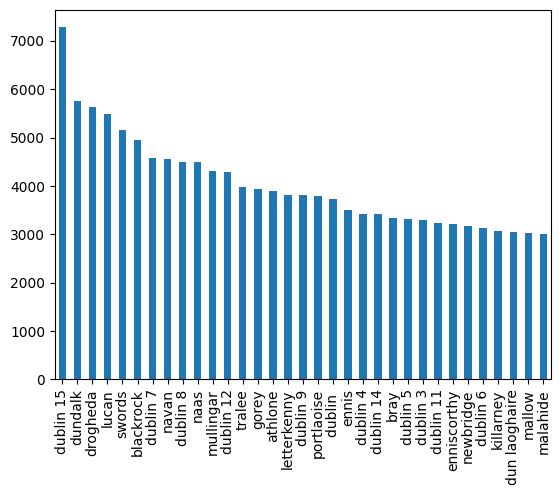

In [29]:
towncount = df.Town.value_counts()
towncount1000 = towncount[towncount>3000]
towncount1000.plot.bar()

In [30]:
county_to_province = {
    'Carlow': 'Leinster',
    'Cavan': 'Ulster',
    'Clare': 'Munster',
    'Cork': 'Munster',
    'Donegal': 'Ulster',
    'Dublin': 'Leinster',
    'Galway': 'Connacht',
    'Kerry': 'Munster',
    'Kildare': 'Leinster',
    'Kilkenny': 'Leinster',
    'Laois': 'Leinster',
    'Leitrim': 'Connacht',
    'Limerick': 'Munster',
    'Longford': 'Leinster',
    'Louth': 'Leinster',
    'Mayo': 'Connacht',
    'Meath': 'Leinster',
    'Monaghan': 'Ulster',
    'Offaly': 'Leinster',
    'Roscommon': 'Connacht',
    'Sligo': 'Connacht',
    'Tipperary': 'Munster',
    'Waterford': 'Munster',
    'Westmeath': 'Leinster',
    'Wexford': 'Leinster',
    'Wicklow': 'Leinster'
}

df['Province'] = df['County'].map(county_to_province)

In [31]:
df

,Date,Town,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Province
0,2010-01-01,churchtown,Dublin,343000.0,No,No,Second-Hand,Leinster
1,2010-03-01,portlaoise,Laois,185000.0,No,Yes,New,Leinster
2,2010-04-01,dublin 14,Dublin,438500.0,No,No,Second-Hand,Leinster
3,2010-04-01,mornington,Meath,400000.0,No,No,Second-Hand,Leinster
4,2010-04-01,melville heights,Kilkenny,160000.0,No,No,Second-Hand,Leinster
...,...,...,...,...,...,...,...,...
589019,2023-03-16,ballaghaderreen,Roscommon,135000.0,No,No,Second-Hand,Connacht
589020,2023-03-16,dundalk,Louth,305000.0,No,No,Second-Hand,Leinster
589021,2023-03-16,greencastle,Donegal,430000.0,No,No,Second-Hand,Ulster
589022,2023-03-16,knocknagoshel,Kerry,50000.0,No,No,Second-Hand,Munster


<AxesSubplot: >

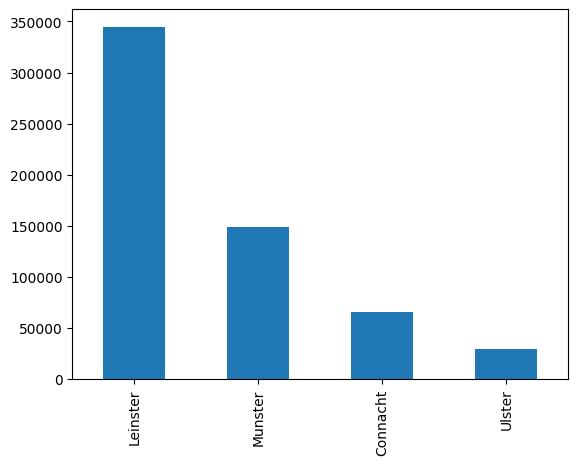

In [24]:
province = df.Province.value_counts()
province.plot.bar()


In [35]:
carlowcount = df[df['County'] == "Carlow"].Town.value_counts()

In [36]:
carlowcount[carlowcount > 50]

tullow            819
tullow rd         493
bagenalstown      371
carlow            318
graiguecullen     254
browneshill rd    203
pollerton         181
dublin rd         171
rathvilly         151
borris            138
leighlinbridge    136
kilkenny rd       112
hacketstown       109
quinagh           108
ballon             90
burrin rd          84
blackbog rd        78
fenagh             73
myshall            71
carlow town        61
athy rd            59
hacketstown rd     58
leighlin rd        53
Name: Town, dtype: int64

In [40]:
towncount200 = towncount[towncount > 200]

<AxesSubplot: ylabel='Frequency'>

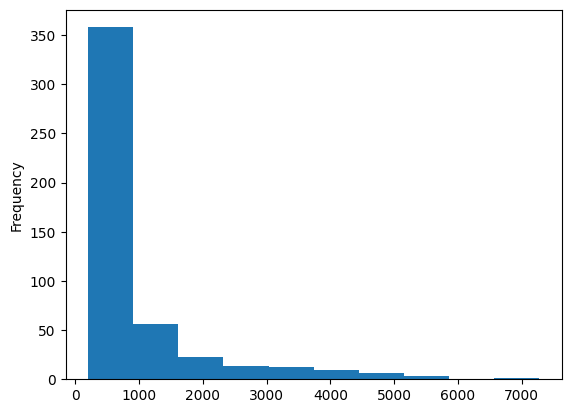

In [41]:
towncount200.plot.hist()

In [44]:
df = df[df['Town'].isin(towncount200.index)]

In [45]:
df

,Date,Town,County,Price,Not Full Market Price,VAT Exclusive,Description of Property,Province
0,2010-01-01,churchtown,Dublin,343000.0,No,No,Second-Hand,Leinster
1,2010-03-01,portlaoise,Laois,185000.0,No,Yes,New,Leinster
2,2010-04-01,dublin 14,Dublin,438500.0,No,No,Second-Hand,Leinster
3,2010-04-01,mornington,Meath,400000.0,No,No,Second-Hand,Leinster
5,2010-04-01,ranelagh,Dublin,425000.0,No,No,Second-Hand,Leinster
...,...,...,...,...,...,...,...,...
589016,2023-03-16,portumna,Galway,110000.0,No,No,Second-Hand,Connacht
589017,2023-03-16,clarina,Limerick,76000.0,Yes,No,Second-Hand,Munster
589018,2023-03-16,carrickmacross,Monaghan,40000.0,No,No,Second-Hand,Ulster
589019,2023-03-16,ballaghaderreen,Roscommon,135000.0,No,No,Second-Hand,Connacht


In [47]:
df.Town.value_counts()

dublin 15              7276
dundalk                5745
drogheda               5638
lucan                  5489
swords                 5150
                       ... 
ramelton                203
galway city             202
sandymount dublin 4     202
lehenaghmore            201
cloughjordan            201
Name: Town, Length: 471, dtype: int64

In [48]:
df.to_csv("PPR-cleaned-v2.csv",index=False)